In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock="POWERGRID.NS"
start= dt.datetime(2000, 1, 1)
end= dt.datetime(2024, 11, 1)
df= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545429,35.424697,26.900123,29.051487,855215656
2007-10-08,30.879326,33.645363,30.685217,33.645363,126671715
2007-10-09,32.982162,33.273323,29.229410,30.895502,116725709
2007-10-10,33.289509,33.968887,32.998348,33.839481,67931378
2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [ ]:
df.shape

(4208, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.483549,80.517027,78.462750,79.520589,1.188963e+07
std,63.570576,64.313382,62.779670,63.552224,2.061999e+07
min,19.001734,20.312198,17.036038,20.213913,0.000000e+00
25%,36.529126,37.105435,35.989640,36.566526,4.799653e+06
50%,55.504950,56.145829,54.762127,55.611509,8.344398e+06
75%,83.112997,84.105066,82.127441,83.135587,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [ ]:
df=df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv("powergrid.csv")

In [ ]:
data01=pd.read_csv("powergrid.csv")

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.54542922973633,35.424697482052096,26.900123201294626,29.0514868911543,855215656
2,1,2007-10-08,30.87932586669922,33.64536260594671,30.685217178555753,33.64536260594671,126671715
3,2,2007-10-09,32.98216247558594,33.27332333144522,29.2294103669374,30.895501630729346,116725709
4,3,2007-10-10,33.28950881958008,33.96888726698826,32.998347881527316,33.83948069921518,67931378


In [ ]:
#Candelsticks
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=data01['Date'],
                                  open=data01['Open'],
                                  high=data01['High'],
                                  low=data01['Low'],
                                  close=data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df=df.drop(["Date"], axis=1)

<ipython-input-36-daa1d7a4afde>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
df.head(2)

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.545429,35.424697,26.900123,29.051487,855215656
1,30.879326,33.645363,30.685217,33.645363,126671715


<function matplotlib.pyplot.show(close=None, block=None)>

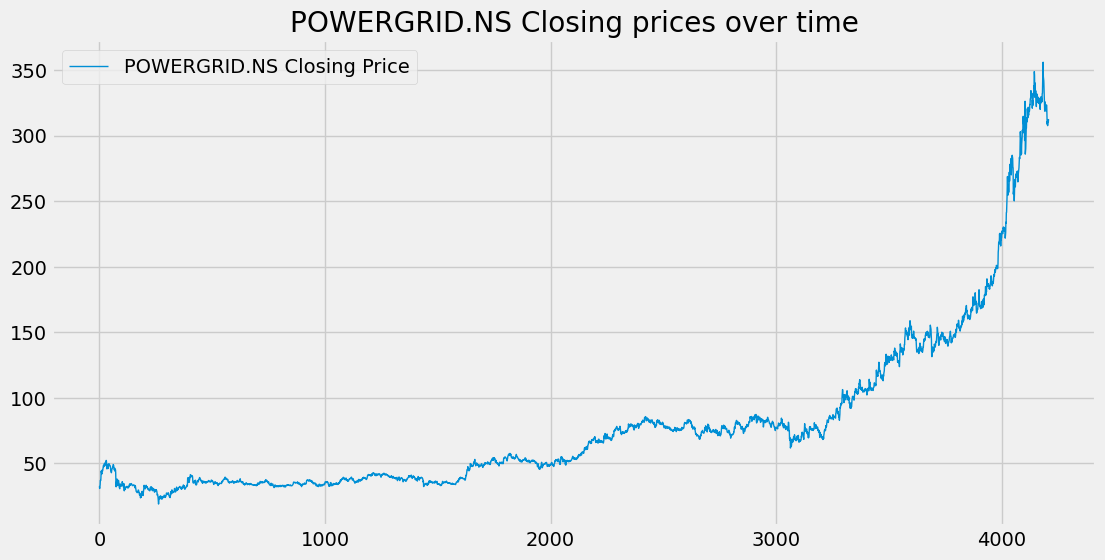

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend( )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

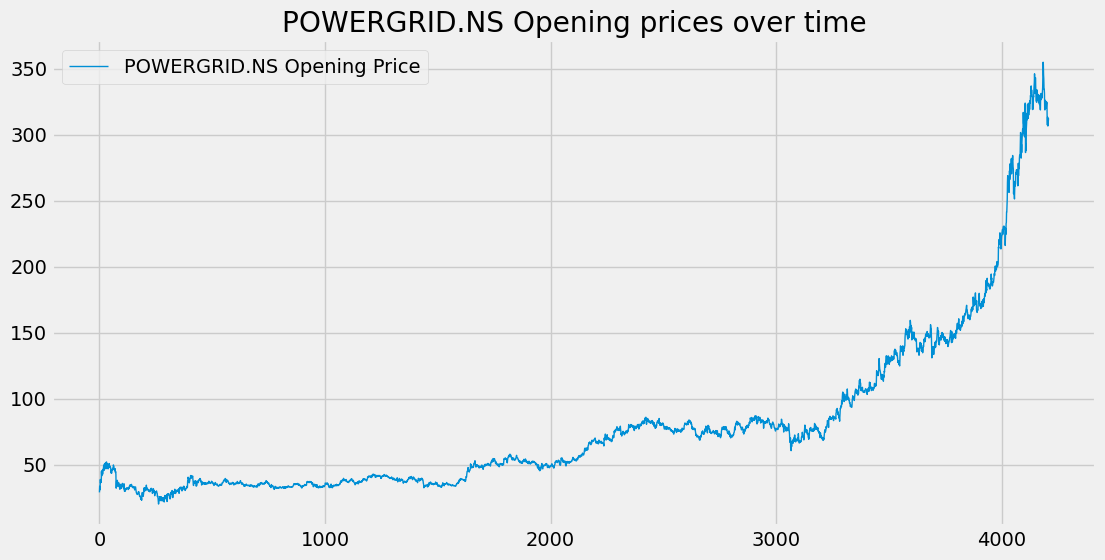

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend( )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

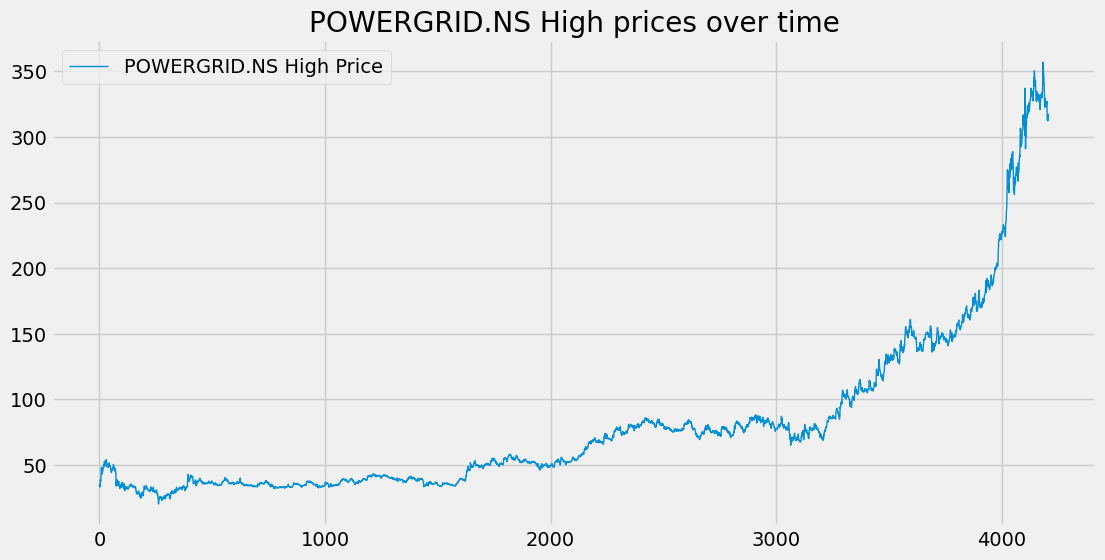

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend( )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

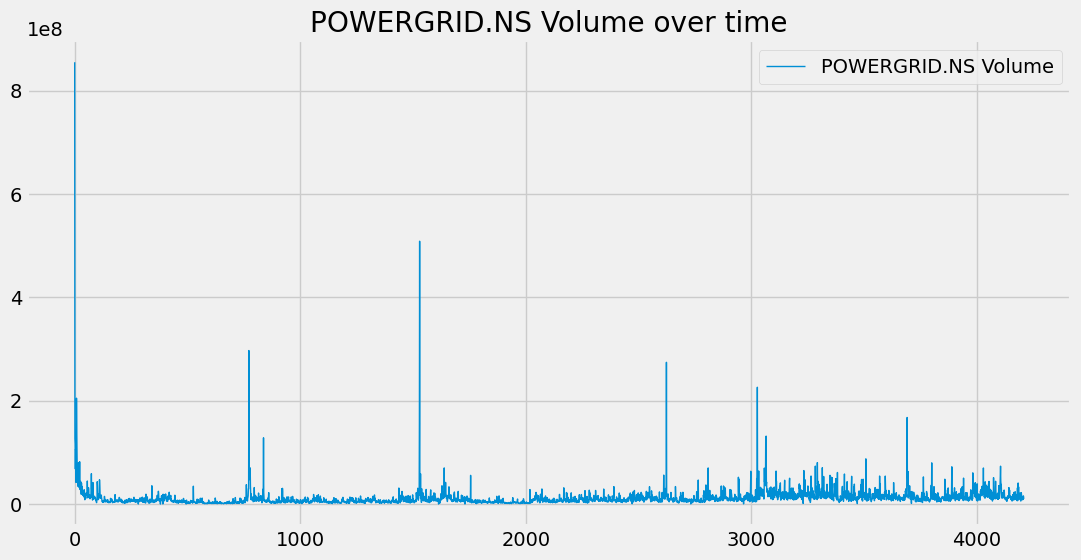

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 1)
plt.title(f'{stock} Volume over time')
plt.legend( )
plt.show

In [ ]:
#Moving average
temp_data= [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [ ]:
df01=pd.DataFrame(temp_data)


In [ ]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670630


In [ ]:
ma200=df.Close.rolling(200).mean()

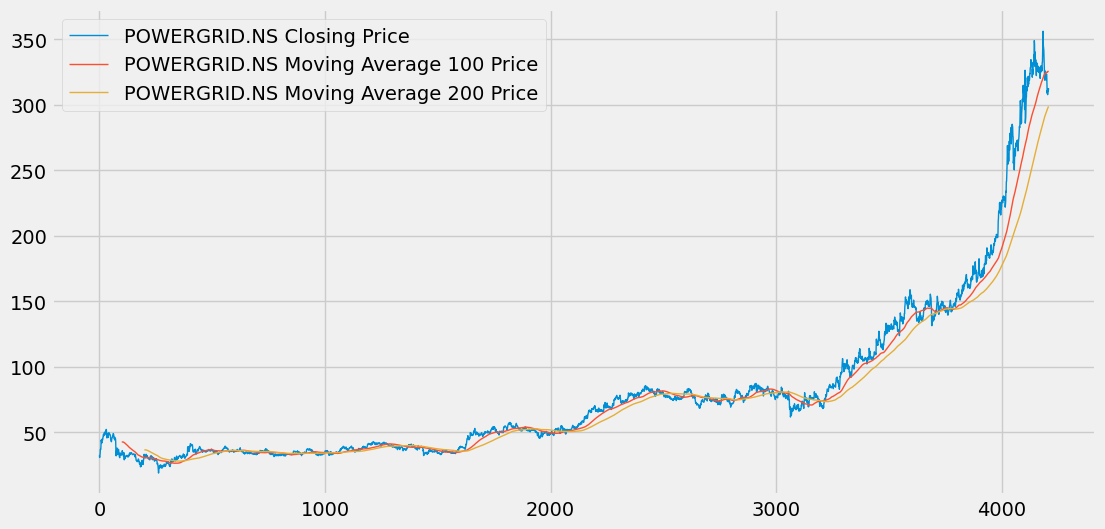

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close, label=f'{stock} Closing Price', linewidth= 1)
plt.plot(ma100,label= f'{stock} Moving Average 100 Price', linewidth= 1)
plt.plot(ma200,label= f'{stock} Moving Average 200 Price', linewidth= 1)
plt.legend()
plt.show()

In [ ]:
ema100=df.Close.ewm(span=100,adjust=False).mean()


In [ ]:
ema200=df['Close'].ewm(span=200, adjust=False).mean()

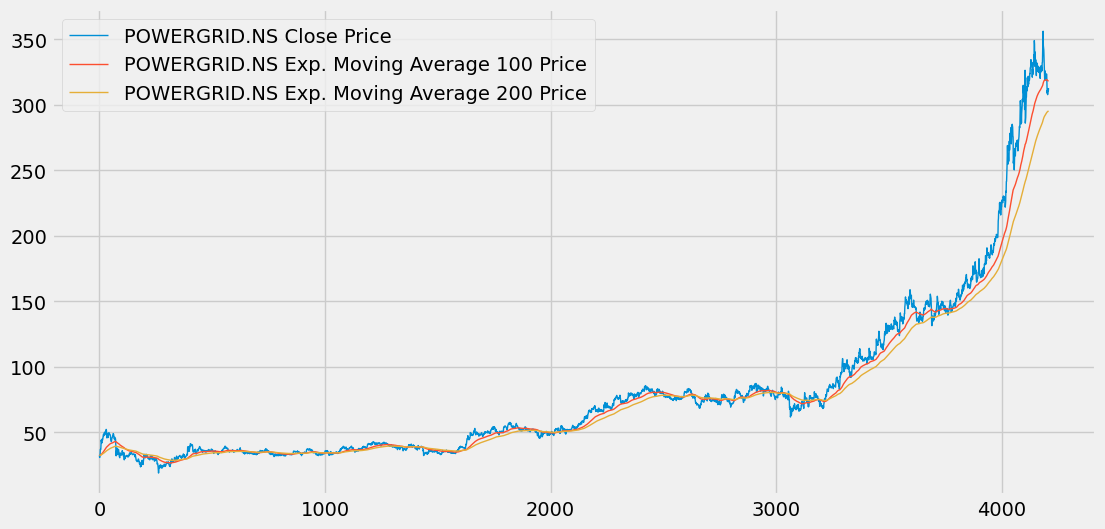

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close, label=f'{stock} Close Price', linewidth= 1)
plt.plot(ema100,label= f'{stock} Exp. Moving Average 100 Price', linewidth= 1)
plt.plot(ema200,label= f'{stock} Exp. Moving Average 200 Price', linewidth= 1)
plt.legend()
plt.show()

In [ ]:
#Training and Testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
data_training.shape

(2945, 1)

In [ ]:
data_testing.shape

(1263, 1)

In [ ]:
#scaling
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array= scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.19808612],
       [0.17371818],
       [0.20447366],
       ...,
       [0.90774418],
       [0.86000398],
       [0.87299641]])

In [ ]:
data_training_array.shape[0]

2945

In [ ]:
x_train= []
y_train= []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train= np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2845, 100, 1)

In [ ]:
#Model Building

model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - loss: 0.0755
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 43s 274ms/step - loss: 0.0079
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - loss: 0.0075
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 45s 327ms/step - loss: 0.0064
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 38s 291ms/step - loss: 0.0052
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - loss: 0.0053
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - loss: 0.0047
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - loss: 0.0050
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 288ms/step - loss: 0.0048
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 264ms/step - loss: 0.0047
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - loss: 0.0042
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - loss: 0.0043
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 264ms/step - loss: 0.0042
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - loss: 0.0037
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [ ]:

past_100_days = data_training.tail(100)

In [ ]:

final_df = past_100_days.append(data_testing, ignore_index = True)

In [ ]:
final_df.head()

In [ ]:

input_data = scaler.fit_transform(final_df)

In [ ]:

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [ ]:

x_test.shape

In [ ]:

y_predicted = model.predict(x_test)

In [ ]:

y_predicted.shape

In [ ]:

scaler.scale_

In [ ]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:

model.save('stock_dl_model.h5')